# Regression

In this notebook, we will present the metrics that can be used in regression.

A set of metrics are dedicated to regression. Indeed, classification metrics
cannot be used to evaluate the statistical performance of regression models
because there is a fundamental difference between their target type `target`:
it is a continuous variable in regression, while a discrete variable in
classification.

We will use the Ames housing dataset. The goal is to predict the price
of houses in the city of Ames, Iowa. As with classification, we will only use
a single train-test split to focus solely on the regression metrics.

In [1]:
import os

os.makedirs("../../datasets", exist_ok=True)

In [2]:
%%bash

wget -qO "../../datasets/house_prices.csv" "https://github.com/INRIA/scikit-learn-mooc/raw/master/datasets/house_prices.csv"

In [3]:
import pandas as pd
import numpy as np

ames_housing = pd.read_csv("../../datasets/house_prices.csv")
data = ames_housing.drop(columns="SalePrice")
target = ames_housing["SalePrice"]
data = data.select_dtypes(np.number)
target /= 1000
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 34 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   Id             1460 non-null   int64
 1   MSSubClass     1460 non-null   int64
 2   LotArea        1460 non-null   int64
 3   OverallQual    1460 non-null   int64
 4   OverallCond    1460 non-null   int64
 5   YearBuilt      1460 non-null   int64
 6   YearRemodAdd   1460 non-null   int64
 7   BsmtFinSF1     1460 non-null   int64
 8   BsmtFinSF2     1460 non-null   int64
 9   BsmtUnfSF      1460 non-null   int64
 10  TotalBsmtSF    1460 non-null   int64
 11  1stFlrSF       1460 non-null   int64
 12  2ndFlrSF       1460 non-null   int64
 13  LowQualFinSF   1460 non-null   int64
 14  GrLivArea      1460 non-null   int64
 15  BsmtFullBath   1460 non-null   int64
 16  BsmtHalfBath   1460 non-null   int64
 17  FullBath       1460 non-null   int64
 18  HalfBath       1460 non-null   int64
 19  Bedroo

<div class="admonition note alert alert-info">
<p class="first admonition-title" style="font-weight: bold;">Note</p>
<p class="last">If you want a deeper overview regarding this dataset, you can refer to the
Appendix - Datasets description section at the end of this MOOC.</p>
</div>

Let's start by splitting our dataset intro a train and test set.

In [4]:
from sklearn.model_selection import train_test_split

data_train, data_test, target_train, target_test = train_test_split(
    data, target, shuffle=True, random_state=0
)

We can display an interactive diagram with the following command:

In [5]:
from sklearn import set_config
set_config(display='diagram')

Some machine learning models are designed to be solved as an optimization
problem: minimizing an error (also known as the loss function) using a
training set.
A basic loss function used in regression is the mean squared error (MSE).
Thus, this metric is sometimes used to evaluate the model since it is
optimized by said model.

We will give an example using a linear regression model.

In [6]:
%%time
from sklearn.linear_model import LinearRegression

regressor = LinearRegression()
regressor.fit(data_train, target_train)

CPU times: user 28.8 ms, sys: 10.1 ms, total: 38.9 ms
Wall time: 46.5 ms


LinearRegression()

In [7]:
%%time
from sklearn.metrics import mean_squared_error

target_predicted = regressor.predict(data_train)

print(f"Mean squared error on the training set: "
    f"{mean_squared_error(target_train, target_predicted):.3f}")

Mean squared error on the training set: 996.902
CPU times: user 19.8 ms, sys: 0 ns, total: 19.8 ms
Wall time: 3.19 ms


Our linear regression model is minimizing the mean squared error on the
training set. It means that there is no other set of coefficients which
will decrease the error.

Then, we can compute the mean squared error on the test set.

In [8]:
%%time
target_predicted = regressor.predict(data_test)

print(f"Mean squared error on the testing set: "
    f"{mean_squared_error(target_test, target_predicted):.3f}")

Mean squared error on the testing set: 2064.736
CPU times: user 24.4 ms, sys: 1 µs, total: 24.4 ms
Wall time: 4.12 ms


The raw MSE can be difficult to interpret. One way is to rescale the MSE
by the variance of the target. This score is known as the $R^2$ also called
the coefficient of determination. Indeed, this is the default score used
in scikit-learn by calling the method `score`.

In [9]:
regressor.score(data_test, target_test)

0.6872520581075442

The $R^2$ score represents the proportion of variance of the target that is
explained by the independent variables in the model. The best score possible
is 1 but there is no lower bound. However, a model that predicts the expected
value of the target would get a score of 0.

In [10]:
from sklearn.dummy import DummyRegressor

dummy_regressor = DummyRegressor(strategy="mean")
dummy_regressor.fit(data_train, target_train)

DummyRegressor()

In [11]:
%%time
print(f"R2 score for a regressor predicting the mean:"
    f"{dummy_regressor.score(data_test, target_test):.3f}")

R2 score for a regressor predicting the mean:-0.000
CPU times: user 5.88 ms, sys: 1.87 ms, total: 7.75 ms
Wall time: 1.31 ms


The $R^2$ score gives insight into the quality of the model's fit. However,
this score cannot be compared from one dataset to another and the value
obtained does not have a meaningful interpretation relative the original unit
of the target. If we wanted to get an interpretable score, we would be
interested in the median or mean absolute error.

In [12]:
%%time
from sklearn.metrics import mean_absolute_error

target_predicted = regressor.predict(data_test)
print(f"Mean absolute error: "
    f"{mean_absolute_error(target_test, target_predicted):.3f} k$")

Mean absolute error: 22.608 k$
CPU times: user 20.4 ms, sys: 2.93 ms, total: 23.4 ms
Wall time: 3.9 ms


By computing the mean absolute error, we can interpret that our model is
predicting on average 22.6 k$ away from the true house price. A disadvantage
of this metric is that the mean can be impacted by large error. For some
applications, we might not want these large errors to have such a big
influence on our metric. In this case we can use the median absolute error.

In [13]:
%%time
from sklearn.metrics import median_absolute_error

print(f"Median absolute error: "
    f"{median_absolute_error(target_test, target_predicted):.3f} k$")

Median absolute error: 14.137 k$
CPU times: user 4.98 ms, sys: 738 µs, total: 5.71 ms
Wall time: 945 µs


The mean absolute error (or median absolute error) still have a known
limitation: committing an error of 50 k\\$ for an house valued at 50 k\\$ has the
same impact than committing an error of 50 k\\$ for an house valued at 500 k\\$.
Indeed, the mean absolute error is not relative.

The mean absolute percentage error introduce this relative scaling.

In [14]:
%%time
from sklearn.metrics import mean_absolute_percentage_error

print(f"Mean absolute percentage error: "
    f"{mean_absolute_percentage_error(target_test, target_predicted) * 100:.3f} %")

Mean absolute percentage error: 13.574 %
CPU times: user 4.91 ms, sys: 719 µs, total: 5.63 ms
Wall time: 923 µs


In addition of metrics, we can visually represent the results by plotting
the predicted values versus the true values.

In [15]:
predicted_actual = {
    "True values (k$)": target_test, 
    "Predicted values (k$)": target_predicted
}
predicted_actual = pd.DataFrame(predicted_actual)
predicted_actual.head()

,True values (k$),Predicted values (k$)
529,200.624,264.222898
491,133.000,154.746966
459,110.000,97.997857
279,192.000,225.208535
655,88.000,96.967182


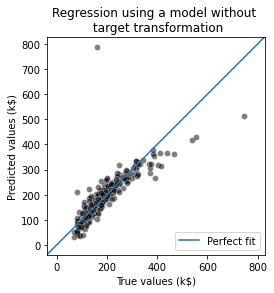

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.scatterplot(data=predicted_actual,
    x="True values (k$)", y="Predicted values (k$)",
    color="black", alpha=0.5
)
plt.axline((0, 0), slope=1, label="Perfect fit")
plt.axis('square')
plt.legend()
_ = plt.title("Regression using a model without \n "
    "target transformation")

On this plot, correct predictions would lie on the diagonal line. This plot
allows us to detect if the model makes errors in a consistent way, i.e.
has some bias.

On this plot, we see that for the large True price values, our model tends to
under-estimate the price of the house. Typically, this issue arises when the
target to predict does not follow a normal distribution. In this case the
model would benefit from target transformation.

In [17]:
from sklearn.preprocessing import QuantileTransformer
from sklearn.compose import TransformedTargetRegressor

transformer = QuantileTransformer(
    n_quantiles=900, output_distribution="normal")
model_transformed_target = TransformedTargetRegressor(
    regressor=regressor, transformer=transformer)
model_transformed_target.fit(data_train, target_train)

TransformedTargetRegressor(regressor=LinearRegression(),
                           transformer=QuantileTransformer(n_quantiles=900,
                                                           output_distribution='normal'))

In [18]:
%%time
target_predicted = model_transformed_target.predict(data_test)
predicted_actual = {
    "True values (k$)": target_test, 
    "Predicted values (k$)": target_predicted
}
predicted_actual = pd.DataFrame(predicted_actual)
predicted_actual.head()

CPU times: user 33.6 ms, sys: 1.49 ms, total: 35.1 ms
Wall time: 5.97 ms


,True values (k$),Predicted values (k$)
529,200.624,246.828849
491,133.000,148.000000
459,110.000,114.752980
279,192.000,205.000000
655,88.000,113.000000


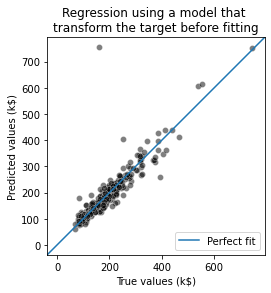

In [19]:
sns.scatterplot(data=predicted_actual,
    x="True values (k$)", y="Predicted values (k$)",
    color="black", alpha=0.5
)
plt.axline((0, 0), slope=1, label="Perfect fit")
plt.axis('square')
plt.legend()
_ = plt.title("Regression using a model that \n"
    "transform the target before fitting")

Thus, once we transformed the target, we see that we corrected some of the
high values.